In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow_datasets as tfds
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
tokenizer = info.features['text'].encoder

In [41]:
print ('Vocabulary size: {}'.format(tokenizer.vocab_size))

Vocabulary size: 8185


In [42]:
sample_string = 'TensorFlow is cool.'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [6307, 2327, 4043, 4265, 9, 2724, 7975]
The original string: TensorFlow is cool.


In [43]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
4265 ----> ow 
9 ----> is 
2724 ----> cool
7975 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0601 17:17:31.286566 140705278998400 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7ff8101349e8>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0601 17:17:31.291764 140705278998400 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7ff80c33d9e8>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 71s 182ms/step - loss: 0.5431 - accuracy: 0.7130 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 64s 165ms/step - loss: 0.3467 - accuracy: 0.8600 - val_loss: 0.4430 - val_accuracy: 0.8112
Epoch 3/10
391/391 [==============================] - 64s 163ms/step - loss: 0.2854 - accuracy: 0.8900 - val_loss: 0.4142 - val_accuracy: 0.8410
Epoch 4/10
391/391 [==============================] - 63s 162ms/step - loss: 0.2187 - accuracy: 0.9191 - val_loss: 0.4438 - val_accuracy: 0.8420
Epoch 5/10
391/391 [==============================] - 64s 163ms/step - loss: 0.2199 - accuracy: 0.9151 - val_loss: 0.4540 - val_accuracy: 0.8168
Epoch 6/10
391/391 [==============================] - 64s 162ms/step - loss: 0.1436 - accuracy: 0.9497 - val_loss: 0.5037 - val_accuracy: 0.8068
Epoch 7/10
391/391 [==============================] - 64s 163ms/step - loss: 0.1500 - accuracy: 0.9464 - val_loss: 0.5409 

In [49]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('test Accuracy: {}'.format(test_acc))

    391/Unknown - 21s 54ms/step - loss: 0.6349 - accuracy: 0.8141Test Loss: 0.6348672890297288
test Accuracy: 0.8141199946403503


In [0]:
# The above model does not mask the padding applied to the sequences.
# This can lead to skewness if we train on padded sequences and test on un-padded sequences.
# Ideally the model would learn to ignore the padding, but as you can see below it does have a small effect on the output.
def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec

In [0]:
def sample_predict(sentence, pad):
    tokenized_sample_pred_text = tokenizer.encode(sample_pred_text)
    
    if pad:
        tokenized_sample_pred_text = pad_to_size(tokenized_sample_pred_text, 64)
        
    predictions = model.predict(tf.expand_dims(tokenized_sample_pred_text, 0))
    
    return (predictions)

In [52]:
# prediction on sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

[[0.8890807]]


In [54]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.93186474]]


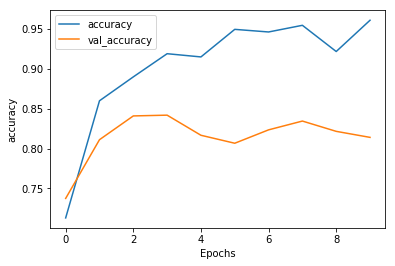

In [55]:
plot_graphs(history, 'accuracy')

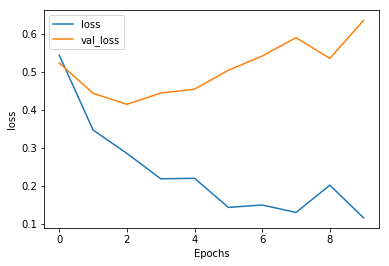

In [56]:
plot_graphs(history, 'loss')

In [57]:
## Stack two or more LSTM layers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0601 17:39:39.903348 140705278998400 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7ff80ee70080>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0601 17:39:39.911477 140705278998400 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7ff80ee702b0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0601 17:39:39.917454 140705278998400 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7ff80defb470>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0601 17:39:39.922269 140705278998400 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7ff80e61f438>: Note that this layer is not optimized for performance. Please use tf.keras.laye

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 118s 301ms/step - loss: 0.6363 - accuracy: 0.6332 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 115s 294ms/step - loss: 0.6369 - accuracy: 0.6579 - val_loss: 0.6349 - val_accuracy: 0.6426
Epoch 3/10
391/391 [==============================] - 114s 291ms/step - loss: 0.4776 - accuracy: 0.7793 - val_loss: 0.4473 - val_accuracy: 0.8047
Epoch 4/10
391/391 [==============================] - 114s 291ms/step - loss: 0.2993 - accuracy: 0.8802 - val_loss: 0.3464 - val_accuracy: 0.8593
Epoch 5/10
391/391 [==============================] - 114s 292ms/step - loss: 0.2222 - accuracy: 0.9154 - val_loss: 0.3202 - val_accuracy: 0.8646
Epoch 6/10
391/391 [==============================] - 115s 293ms/step - loss: 0.1682 - accuracy: 0.9390 - val_loss: 0.3646 - val_accuracy: 0.8593
Epoch 7/10
391/391 [==============================] - 114s 293ms/step - loss: 0.1226 - accuracy: 0.9584 - val_loss: 

In [61]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 36s 93ms/step - loss: 0.5361 - accuracy: 0.8630Test Loss: 0.5360682791151354
Test Accuracy: 0.8629999756813049


In [62]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.00296192]]


In [63]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.00227509]]


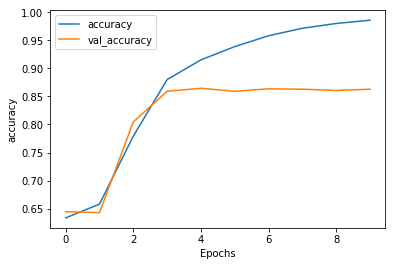

In [64]:
plot_graphs(history, 'accuracy')

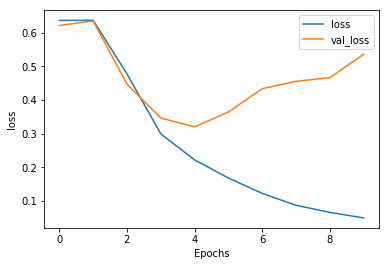

In [65]:
plot_graphs(history, 'loss')